<a href="https://colab.research.google.com/github/pjakobsen/pydough/blob/main/KernelSmoothingPopulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I’m not sure if I should contact the author directly, but you may be interested to note that some of the data sets provided in the Dougherty site contain errors and omissions that make it difficult to replicated some of the exercises provided in the book. 

In [15]:
#!pip install wbdata    
import wbdata
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf



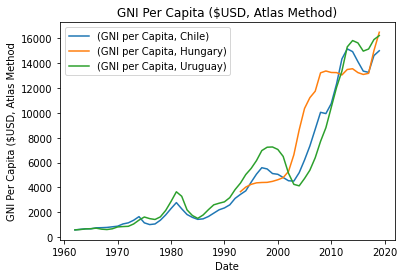

In [22]:
import matplotlib.pyplot as plt
 
#set up the countries I want
countries = ["CL","UY","HU"]
 
#set up the indicator I want (just build up the dict if you want more than one)
indicators = {'NY.GNP.PCAP.CD':'GNI per Capita'}
 
#grab indicators above for countires above and load into data frame
df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)

#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)

# a simple matplotlib plot with legend, labels and a title
dfu.plot(); 
plt.legend(loc='best'); 
plt.title("GNI Per Capita ($USD, Atlas Method)"); 
plt.xlabel('Date'); plt.ylabel('GNI Per Capita ($USD, Atlas Method');

In [23]:
# Get data directly from Dougherty without any need to download first
# This is Data on GDP Growth and Employment

#df = pd.read_excel('http://global.oup.com/uk/orc/busecon/economics/dougherty5e/student/datasets/oecd/excel/oecd.xls'
df = pd.read_stata('http://global.oup.com/uk/orc/busecon/economics/dougherty5e/student/datasets/oecd/stata/oecd.dta')

#

In [20]:
# Check to see if countries are the same
df['country']
df

,country,WAGES,PRICES,GDP,EMPLOY,MONEY1,MONEY2,UNEMPLOY
0,Ausstralia,4.41,3.750000,3.04,1.68,9.10,10.980000,8.680000
1,Austria,4.15,2.710000,2.55,0.65,5.37,7.370000,5.480000
2,Belgium,3.99,2.370000,2.16,0.34,5.87,NaN,8.490000
3,Canada,3.76,2.830000,2.03,1.17,6.13,8.510000,9.510000
4,Denmark,3.78,2.610000,2.02,0.02,3.21,4.510000,7.680000
5,Finland,5.65,3.110000,1.78,-1.06,5.97,NaN,10.440000
6,France,3.55,2.400000,2.08,0.28,5.19,4.050000,10.840000
7,Germany,4.08,2.780000,2.71,0.08,9.08,7.590000,6.860000
8,Greece,14.18,13.090000,2.08,0.87,14.46,14.140000,8.840000
9,Iceland,NaN,8.420000,1.54,-0.13,10.73,13.640000,3.070000


In [25]:
# We want to replicate Exercise 1.5 pg. 102
mod = smf.ols('EMPLOY ~ GDP', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 EMPLOY   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     14.06
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           0.000988
Time:                        20:20:20   Log-Likelihood:                -35.849
No. Observations:                  26   AIC:                             75.70
Df Residuals:                      24   BIC:                             78.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3750      0.410     -0.914      0.3

In [26]:
# This is not helpful, so we'll need to get out own data to replicated list of countries for
# 2002 -2007
# We can at least get list of countris from the previous data and use it in our world bank search
countries = list(df['country'])
countries
# We also 
data_date = datetime.datetime(2010, 1, 1), datetime.datetime(2011, 1, 1) 
df = wbdata.get_data("IC.BUS.EASE.XQ", country=countries, data_date=data_date)    

['Ausstralia',
 'Austria',
 'Belgium',
 'Canada',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Italy',
 'Japan',
 'Korea',
 'Luxembourg',
 'Mexico',
 'Netherlands',
 'Norway',
 'NZ',
 'Portugal',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'UK',
 'USA']